# House Prices: Advanced Regression Techniques
Predict sales prices and practice feature engineering, RFs, and gradient boosting


## Table of content
1. [Framing the problem](#problem)
2. [Import the libraries](#imports)
3. [Load the data](#data) 
4. [Exploratory data analysis (EDA)](#eda) <br>
    4.1. [Missing data](#Missing)<br>
    4.2. [Histogram](#h)<br>
    4.3. [Correlations & Heatmap](#Heat)<br> 
    4.4. [Scatter plot](#scatter)<br>
    4.5. [Boxplot](#box)<br> 
5. [Preprocessing and Feature engineering](#preproc)<br>
    5.1. [Outliers](#out) <br>
    5.2. [Bad features](#bad) <br>
    5.3. [Fill missing values](#fill)<br>
    5.4. [process the categorical features](#cat)<br>
6. [Model and Prediction](#pred)<br>
    6.1. [Xgboost](#xgboost)<br>
    6.2. [Artificial Neural Network Implementation](#ann)<br>
7. [Metric and evaluation](#metric)

## 1. Framing the problem
<a id="problem"></a>
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

#### Practice Skills
Creative feature engineering 
Advanced regression techniques like random forest and gradient boosting

## 2. Import libraries
<a id="imports"></a>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Load the data
<a id="data"></a>

In [52]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

## 4. Exploratory data analysis (EDA)
<a id="eda"></a>

In [53]:
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [54]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 4.1. Missing data
<a id="Missing"></a>

In [56]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("The selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [57]:
missing_values_table(train_df)

The selected dataframe has 81 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


In [58]:
missing_values_table(test_df)

The selected dataframe has 80 columns.
There are 33 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1456,99.8
MiscFeature,1408,96.5
Alley,1352,92.7
Fence,1169,80.1
FireplaceQu,730,50.0
LotFrontage,227,15.6
GarageCond,78,5.3
GarageYrBlt,78,5.3
GarageQual,78,5.3
GarageFinish,78,5.3


### Visualize the missing data statistics:

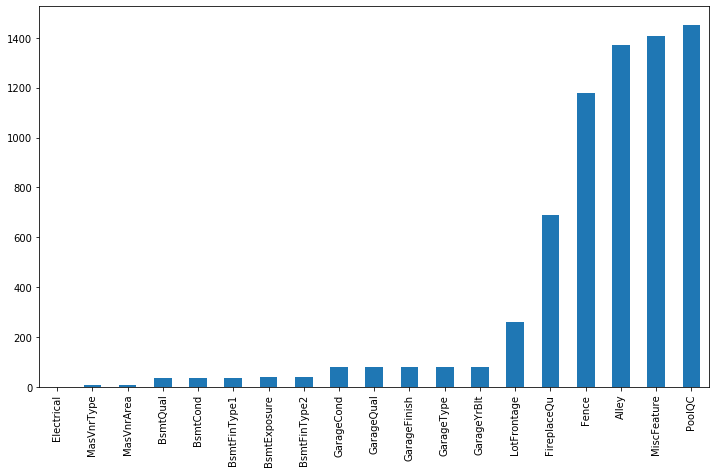

In [59]:
missing = train_df.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
plt.figure(figsize=(12,7))
missing.plot.bar()

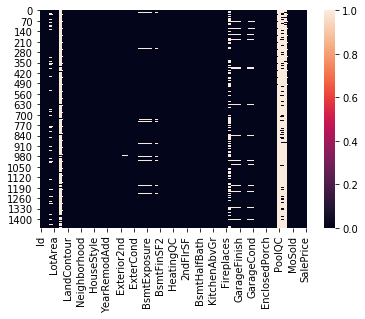

In [60]:
sns.heatmap(train_df.isnull());

### 4.2. Histogram
<a id="h"></a>

The SalePrice distribution is scewd to the right:

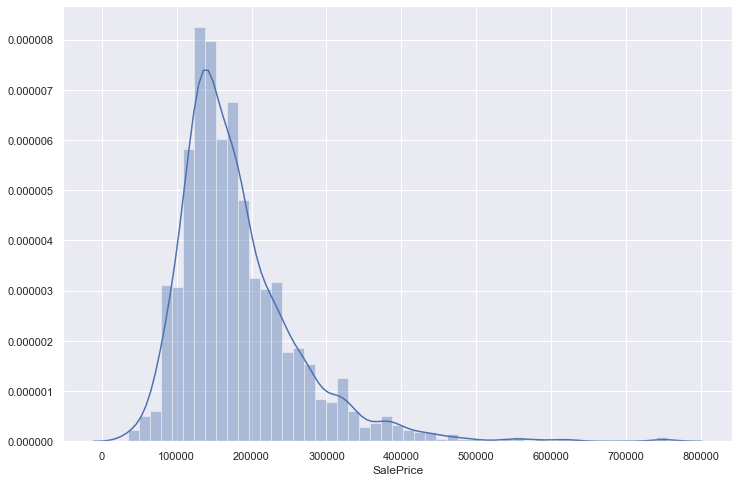

In [61]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(train_df['SalePrice']);

In [62]:
#skewness and kurtosis
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


#### Value count

In [63]:
train_df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

### 4.3. Correlations & Heatmap
<a id="Heat"></a>


## Corelations:
1) Cathegorical <br>
    1.1) ordinsl: e.g. rating with stars<br>
    1.2) nominal: e.g. cathegorical features

In [64]:
numeric_features = train_df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [65]:
len(numeric_features.columns)

38

In [66]:
cat_features = train_df.select_dtypes(include=[np.object])
cat_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [67]:
len(cat_features.columns)

43

In [68]:
numeric_corr = numeric_features.corr()
c = numeric_corr['SalePrice'].sort_values(ascending=False)
print(c.index)


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
       'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
       'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass',
       'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')


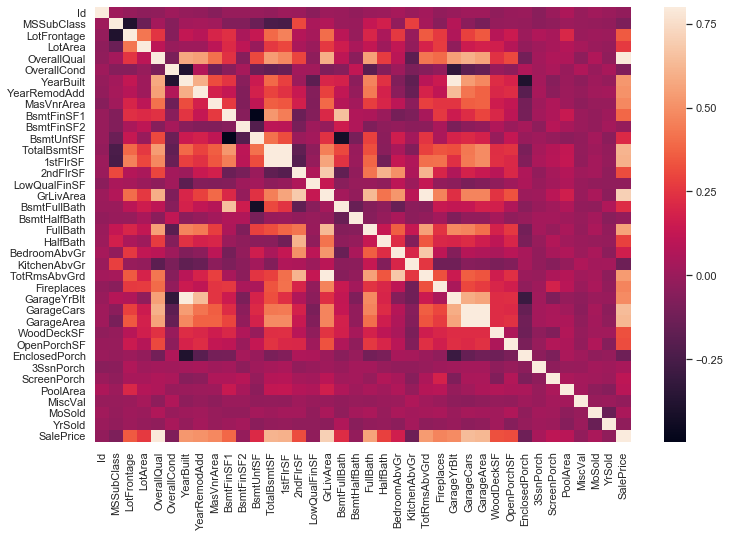

In [69]:
sns.heatmap(numeric_corr, vmax=0.8)

Heatmap using only the most important features:

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


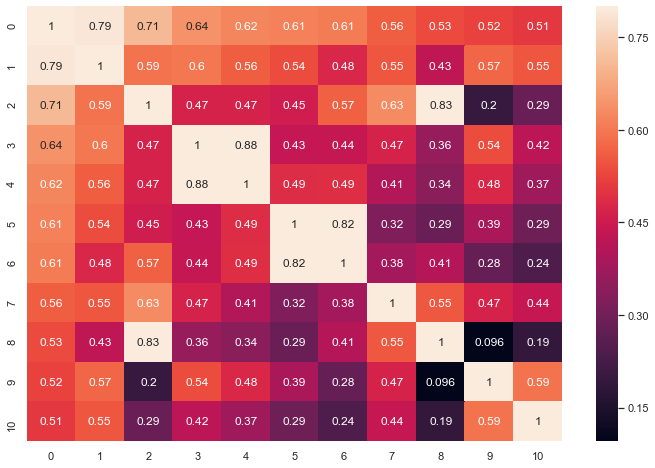

In [70]:
K = 11
features_corr = numeric_corr.nlargest(K,'SalePrice')['SalePrice'].index
print(features_corr)
cm = np.corrcoef(train_df[features_corr].values.T)
sns.heatmap(cm, vmax=0.8, annot=True)

### 4.4. Scatter plot
<a id="scatter"></a>

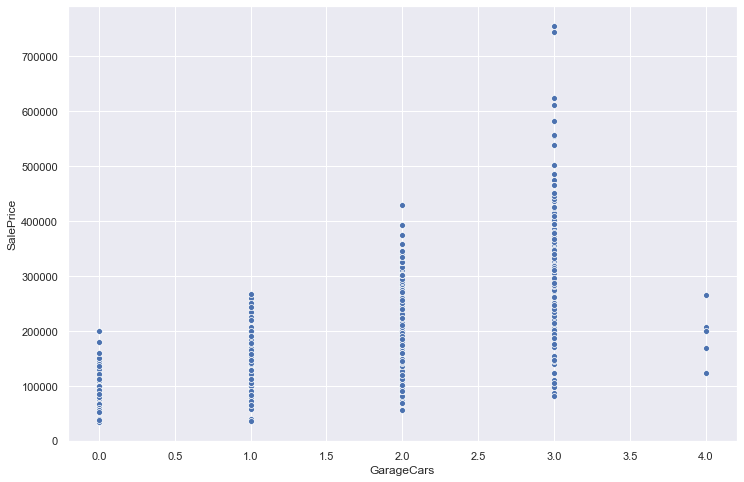

In [71]:
sns.scatterplot('GarageCars', 'SalePrice', data=train_df)

Visualisation of the most correlated features in scatterplots:
The scatter plots are revealing the outlier data which is better be eliminated for a more accurate model.

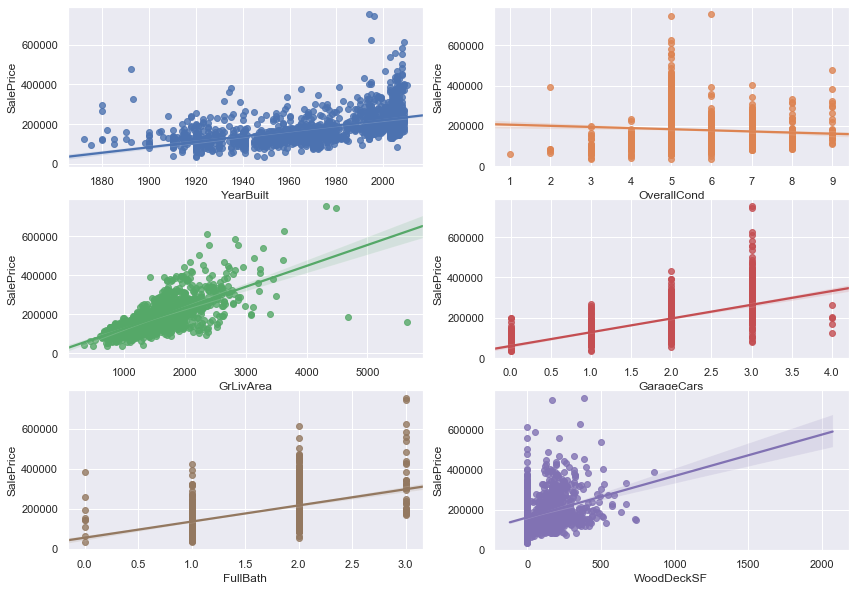

In [72]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3,2, figsize=(14,10))

sns.regplot('YearBuilt', 'SalePrice', data=train_df, fit_reg=True, ax=ax1)
sns.regplot('OverallCond', 'SalePrice', data=train_df, fit_reg=True, ax=ax2)
sns.regplot('GrLivArea', 'SalePrice', data=train_df, fit_reg=True, ax=ax3)
sns.regplot('GarageCars', 'SalePrice', data=train_df, fit_reg=True, ax=ax4)
sns.regplot('WoodDeckSF', 'SalePrice', data=train_df, fit_reg=True, ax=ax6)

sns.regplot('FullBath', 'SalePrice', data=train_df,fit_reg=True, ax=ax5);


### 4.5. Boxplot
<a id="box"></a>

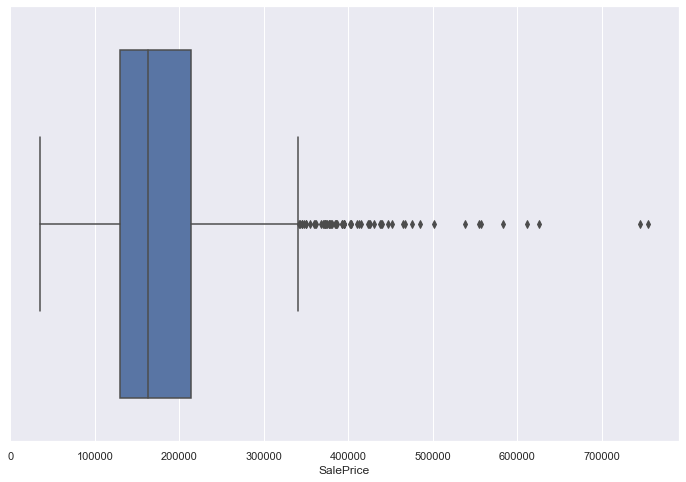

In [73]:
sns.boxplot(train_df['SalePrice'])

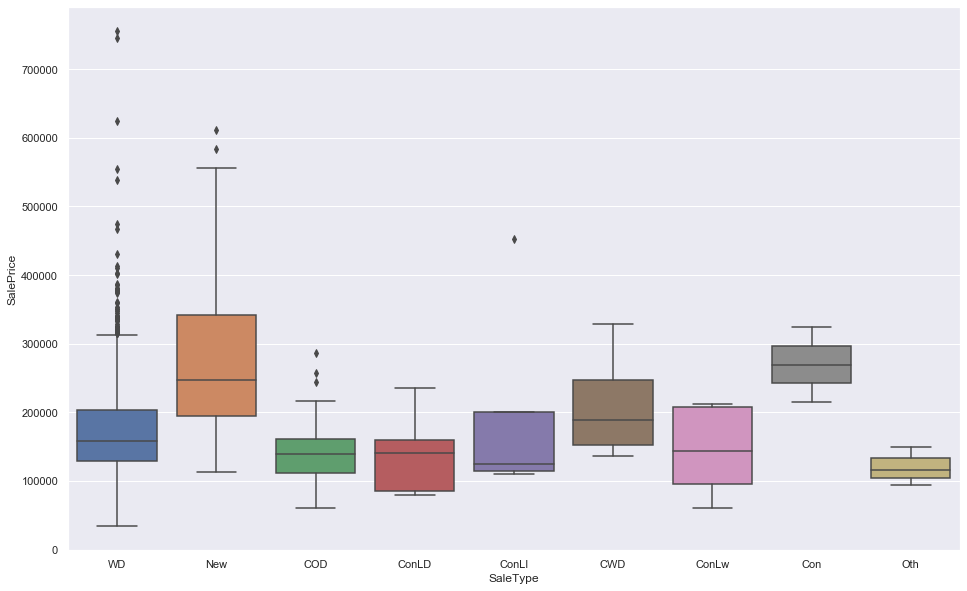

In [74]:
fig, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot('SaleType', 'SalePrice',data=train_df)

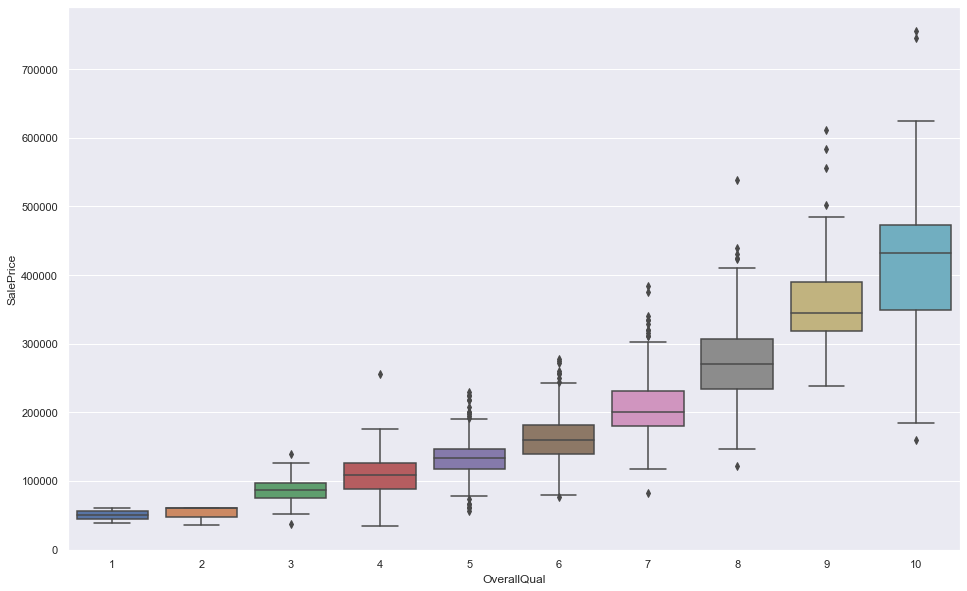

In [75]:
fig, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot('OverallQual', 'SalePrice',data=train_df)

## 5. Preprocessing and Feature engineering
<a id="preproc"></a>

### 5.1. Outliers
<a id="out"></a>

In [76]:
train_df.shape

(1460, 81)

In [77]:
first_quartile = train_df['SalePrice'].quantile(.25)
third_quartile = train_df['SalePrice'].quantile(.75)
IQR = third_quartile - first_quartile

In [78]:
boundary = third_quartile + 3*IQR 

In [79]:
train_df.drop(train_df[train_df['SalePrice']>boundary].index, axis=0, inplace=True)

In [80]:
train_df.shape

(1448, 81)

### 5.2. Bad features
<a id="bad"></a>

Multicollinear features:
1. GarageArea & GarageCars
2. GrLivArea & FillBath
3. TitalBsmtSF & 1stFlrSF
4. TotRmsAbvGrd & GrLivArea

Features with high amount of missing values:
5. PoolQC		$\;\;\;\;\;\;$99.8%
6. MiscFeature	$\;\;\;\;\;\;$96.5%
7. Alley		$\;\;\;\;\;\;$92.7%
8. Fence		$\;\;\;\;\;\;$80.1%
9. FireplaceQu	$\;\;\;\;\;\;$50.0% I decided to keep this one!

Features with low correlation with the target value 'SalePrice':
10. WoodDeckSF       $\;\;\;\;\;\;$ 0.324413
11. 2ndFlrSF        $\;\;\;\;\;\;$ 0.319334
12. OpenPorchSF  $\;\;\;\;\;\;$    0.315856
13. HalfBath    $\;\;\;\;\;\;$     0.284108
14. LotArea    $\;\;\;\;\;\;$      0.263843
15. BsmtFullBath $\;\;\;\;\;\;$    0.227122
16. BsmtUnfSF    $\;\;\;\;\;\;$    0.214479
17. BedroomAbvGr  $\;\;\;\;\;\;$   0.168213
18. ScreenPorch  $\;\;\;\;\;\;$    0.111447
19. PoolArea    $\;\;\;\;\;\;$     0.092404
20. MoSold      $\;\;\;\;\;\;$     0.046432
21. 3SsnPorch   $\;\;\;\;\;\;$     0.044584
22. BsmtFinSF2   $\;\;\;\;\;\;$   -0.011378
23. BsmtHalfBath  $\;\;\;\;\;\;$  -0.016844
24. MiscVal       $\;\;\;\;\;\;$  -0.021190
25. Id         $\;\;\;\;\;\;$     -0.021917
26. LowQualFinSF  $\;\;\;\;\;\;$  -0.025606
27. YrSold       $\;\;\;\;\;\;$   -0.028923
28. OverallCond  $\;\;\;\;\;\;$   -0.077856
29. MSSubClass    $\;\;\;\;\;\;$  -0.084284
30. EnclosedPorch $\;\;\;\;\;\;$  -0.128578
31. KitchenAbvGr  $\;\;\;\;\;\;$  -0.135907

In [81]:
cols_to_remove = ['WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF',
                  'BedroomAbvGr', 'ScreenPorch','PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
                  'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass','EnclosedPorch', 
                  'KitchenAbvGr', 'Alley', 'GarageYrBlt', 'PoolQC','Fence','MiscFeature']

In [82]:
train_df.drop(cols_to_remove, axis=1, inplace=True)

In [83]:
train_df.shape

(1448, 54)

In [84]:
train_df.columns


Index(['MSZoning', 'LotFrontage', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

### The test data should go through similar preprocessing as the training data.

In [85]:
test_df.drop(cols_to_remove, axis=1, inplace=True)

In [86]:
test_df.shape

(1459, 53)

### 5.3. Fill missing values
<a id="fill"></a>

In [87]:
cols_to_fill = ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtFinType2', 'MSZoning', 'GarageCond', 'GarageQual',
                'GarageFinish', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtExposure',
                'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1','MasVnrType', 'Electrical','Utilities', 'Functional', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1',
       'TotalBsmtSF', 'KitchenQual', 'GarageCars', 'GarageArea', 'SaleType' ]
for column in cols_to_fill:
    train_df[column]=train_df[column].fillna(train_df[column].mode()[0])



In [88]:
for column in cols_to_fill:
    test_df[column]=test_df[column].fillna(test_df[column].mode()[0])

In [89]:
missing_values_table(train_df)
missing_values_table(test_df)
#print(missing_values_table(test_df).index)

The selected dataframe has 54 columns.
There are 0 columns that have missing values.
The selected dataframe has 53 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### 5.4. process the categorical features
<a id="cat"></a>

In [90]:
categorical_features_columns = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType','SaleCondition','ExterCond','ExterQual',
         'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','RoofStyle','RoofMatl',
         'Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC', 'CentralAir', 'Electrical','KitchenQual',
         'Functional', 'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']
len(categorical_features_columns)

39

In [91]:
train_df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1448, dtype: int64

### There are more cathegories in some columns of train data, these should be removed since they don't exist in the test data.

In [92]:
test_train_df=pd.concat([train_df,test_df],axis=0)
test_train_df.columns

C:\Users\nasta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Index(['1stFlrSF', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'FireplaceQu', 'Fireplaces', 'Foundation', 'FullBath',
       'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish',
       'GarageQual', 'GarageType', 'GrLivArea', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotFrontage', 'LotShape', 'MSZoning', 'MasVnrArea', 'MasVnrType',
       'Neighborhood', 'OverallQual', 'PavedDrive', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SalePrice', 'SaleType', 'Street', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'Utilities', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

In [93]:
test_train_df_cathegorized = pd.concat([pd.get_dummies(test_train_df[col],drop_first=True) for col in categorical_features_columns], axis=1)
test_train_df.drop(categorical_features_columns,axis=1,inplace=True)
df_final = pd.concat([test_train_df_cathegorized,test_train_df],axis=1)

In [94]:
df_final = df_final.loc[:,~df_final.columns.duplicated()]

In [95]:
df_Train_final =df_final.iloc[:1448,:]
df_Test_final =df_final.iloc[1448:,:]

In [96]:
df_Train_final.head()

,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,...,GarageCars,GrLivArea,LotFrontage,MasVnrArea,OverallQual,SalePrice,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd
0,0,0,1,0,1,0,0,1,0,0,...,2.0,1710,65.0,196.0,7,208500.0,8,856.0,2003,2003
1,0,0,1,0,1,0,0,1,0,0,...,2.0,1262,80.0,0.0,6,181500.0,6,1262.0,1976,1976
2,0,0,1,0,1,0,0,0,0,0,...,2.0,1786,68.0,162.0,7,223500.0,6,920.0,2001,2002
3,0,0,1,0,1,0,0,0,0,0,...,3.0,1717,60.0,0.0,7,140000.0,7,756.0,1915,1970
4,0,0,1,0,1,0,0,0,0,0,...,3.0,2198,84.0,350.0,8,250000.0,9,1145.0,2000,2000


In [97]:
df_Train_final['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
          ...   
1430    192140.0
1431    143750.0
1432     64500.0
1433    186500.0
1434    160000.0
1435    174000.0
1436    120500.0
1437    394617.0
1438    149700.0
1439    197000.0
1440    191000.0
1441    149300.0
1442    310000.0
1443    121000.0
1444    179600.0
1445    129000.0
1446    157900.0
1447    240000.0
1448    112000.0
1449     92000.0
1450    136000.0
1451    287090.0
1452    145000.0
1453     84500.0
1454    185000.0
1455    175000.0
1456    210000.0
1457    266500

In [98]:
df_Test_final.head()

,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,...,GarageCars,GrLivArea,LotFrontage,MasVnrArea,OverallQual,SalePrice,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd
0,0,1,0,0,1,0,0,1,0,0,...,1.0,896,80.0,0.0,5,NaN,5,882.0,1961,1961
1,0,0,1,0,1,0,0,0,0,0,...,1.0,1329,81.0,108.0,6,NaN,6,1329.0,1958,1958
2,0,0,1,0,1,0,0,0,0,0,...,2.0,1629,74.0,0.0,5,NaN,6,928.0,1997,1998
3,0,0,1,0,1,0,0,0,0,0,...,2.0,1604,78.0,20.0,6,NaN,7,926.0,1998,1998
4,0,0,1,0,1,0,0,0,1,0,...,2.0,1280,43.0,0.0,8,NaN,5,1280.0,1992,1992


In [99]:
df_Test_final.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\nasta\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [100]:
X_train=df_Train_final.drop(['SalePrice'],axis=1)
y_train=df_Train_final['SalePrice']
X_train.columns[X_train.columns.duplicated()]

Index([], dtype='object')

## 6. Model and Prediction
<a id="pred"></a>

### 6.1. Xgboost 
<a id="xgboost"></a>

In [101]:
import xgboost
classifier=xgboost.XGBRegressor()

In [102]:
import xgboost
regressor=xgboost.XGBRegressor()

In [103]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [104]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [105]:
from sklearn.model_selection import RandomizedSearchCV

random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [106]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   22.6s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  7.4min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 10.5min finished
C:\Users\nasta\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nasta\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[15:37:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree',

In [107]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [108]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [109]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [110]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [111]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [117]:
y_pred=regressor.predict(df_Test_final)


In [118]:
y_pred

array([121076.336, 150799.03 , 181704.53 , ..., 170026.08 , 120659.836,
       242817.48 ], dtype=float32)

### Now we need to creat a csv file to submit to kaggle:

In [124]:
pred=pd.DataFrame(y_pred)
to_kaggle_df=pd.read_csv("data/sample_submission.csv")
datasets=pd.concat([to_kaggle_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv("data/sample_submission.csv",index=False)

### 6.2. Artificial Neural Network Implementation
<a id="ann"></a>

In [127]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 154))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)

C:\Users\nasta\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=154, units=50, kernel_initializer="he_uniform")`
C:\Users\nasta\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=25, kernel_initializer="he_uniform")`
C:\Users\nasta\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50, kernel_initializer="he_uniform")`
C:\Users\nasta\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="he_uniform")`


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\nasta\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 1158 samples, validate on 290 samples
Epoch 1/1000
1158/1158 [==============================] - 1s 717us/step - loss: 169602.2815 - val_loss: 106832.6277
Epoch 2/1000
1158/1158 [==============================] - 0s 256us/step - loss: 55394.1023 - val_loss: 48844.0064
Epoch 3/1000
1158/1158 [==============================] - 0s 264us/step - loss: 46844.0162 - val_loss: 47510.7511
Epoch 4/1000
1158/1158 [==============================] - 0s 211us/step - loss: 45088.8635 - val_loss: 46343.4370
Epoch 5/1000
1158/1158 [==============================] - 0s 196us/step - loss: 42779.9552 - val_loss: 45297.6796
Epoch 6/1000
1158/1158 [==============================] - 0s 234us/step - loss: 41392.7066 - val_loss: 44531.0490
Epoch 7/1000
1158/1158 [==============================] - 0s 313us/step - loss: 39990.5018 - val_loss: 43843.7509
Epoch 8/1000
1158/1158 [==============================] - 0s 326us/step - loss: 38274.6735 - val_loss: 43335.1276
Epoch 9/1000
1158/1158 [==============

1158/1158 [==============================] - 0s 144us/step - loss: 32236.0198 - val_loss: 42911.9972
Epoch 71/1000
1158/1158 [==============================] - 0s 144us/step - loss: 32404.2525 - val_loss: 42453.3185
Epoch 72/1000
1158/1158 [==============================] - 0s 138us/step - loss: 32331.0749 - val_loss: 42200.1705
Epoch 73/1000
1158/1158 [==============================] - 0s 158us/step - loss: 32008.5126 - val_loss: 42464.4015
Epoch 74/1000
1158/1158 [==============================] - 0s 148us/step - loss: 31909.7273 - val_loss: 42299.2126
Epoch 75/1000
1158/1158 [==============================] - 0s 147us/step - loss: 32209.5169 - val_loss: 42356.1932
Epoch 76/1000
1158/1158 [==============================] - 0s 139us/step - loss: 32403.5033 - val_loss: 43484.3027
Epoch 77/1000
1158/1158 [==============================] - 0s 180us/step - loss: 31827.0135 - val_loss: 42950.8769
Epoch 78/1000
1158/1158 [==============================] - 0s 252us/step - loss: 32042.9854 - 

1158/1158 [==============================] - 0s 139us/step - loss: 28859.7956 - val_loss: 39742.1854
Epoch 142/1000
1158/1158 [==============================] - 0s 130us/step - loss: 28510.4214 - val_loss: 38969.2846
Epoch 143/1000
1158/1158 [==============================] - 0s 131us/step - loss: 28589.4674 - val_loss: 39110.0682
Epoch 144/1000
1158/1158 [==============================] - 0s 135us/step - loss: 28433.2264 - val_loss: 38906.9096
Epoch 145/1000
1158/1158 [==============================] - 0s 131us/step - loss: 28570.4576 - val_loss: 39018.1368
Epoch 146/1000
1158/1158 [==============================] - 0s 150us/step - loss: 28863.3864 - val_loss: 41539.4896
Epoch 147/1000
1158/1158 [==============================] - 0s 228us/step - loss: 28561.8943 - val_loss: 39073.7245
Epoch 148/1000
1158/1158 [==============================] - 0s 161us/step - loss: 28400.4576 - val_loss: 38418.1073
Epoch 149/1000
1158/1158 [==============================] - 0s 135us/step - loss: 27968

Epoch 212/1000
1158/1158 [==============================] - 0s 164us/step - loss: 24590.4251 - val_loss: 32943.3160
Epoch 213/1000
1158/1158 [==============================] - 0s 131us/step - loss: 24849.1737 - val_loss: 33354.5398
Epoch 214/1000
1158/1158 [==============================] - 0s 126us/step - loss: 24461.1833 - val_loss: 33123.4647
Epoch 215/1000
1158/1158 [==============================] - 0s 127us/step - loss: 24636.1515 - val_loss: 32879.1151
Epoch 216/1000
1158/1158 [==============================] - 0s 119us/step - loss: 24331.4109 - val_loss: 33159.9798
Epoch 217/1000
1158/1158 [==============================] - 0s 151us/step - loss: 24854.1488 - val_loss: 32729.0875
Epoch 218/1000
1158/1158 [==============================] - 0s 133us/step - loss: 24188.8584 - val_loss: 32711.6993
Epoch 219/1000
1158/1158 [==============================] - 0s 119us/step - loss: 24121.5978 - val_loss: 32579.4521
Epoch 220/1000
1158/1158 [==============================] - 0s 123us/ste

1158/1158 [==============================] - 0s 123us/step - loss: 22277.7035 - val_loss: 29308.2328
Epoch 283/1000
1158/1158 [==============================] - 0s 196us/step - loss: 22616.0163 - val_loss: 29136.1994
Epoch 284/1000
1158/1158 [==============================] - 0s 170us/step - loss: 22648.0906 - val_loss: 30620.2911
Epoch 285/1000
1158/1158 [==============================] - 0s 119us/step - loss: 22202.3356 - val_loss: 29043.0486
Epoch 286/1000
1158/1158 [==============================] - 0s 118us/step - loss: 22527.6204 - val_loss: 30399.5503
Epoch 287/1000
1158/1158 [==============================] - 0s 120us/step - loss: 22004.1503 - val_loss: 29542.5837
Epoch 288/1000
1158/1158 [==============================] - 0s 141us/step - loss: 21599.7147 - val_loss: 28997.4057
Epoch 289/1000
1158/1158 [==============================] - 0s 121us/step - loss: 22020.0029 - val_loss: 30009.3386
Epoch 290/1000
1158/1158 [==============================] - 0s 119us/step - loss: 22061

Epoch 353/1000
1158/1158 [==============================] - 0s 157us/step - loss: 20817.0988 - val_loss: 26370.1276
Epoch 354/1000
1158/1158 [==============================] - 0s 149us/step - loss: 21009.1446 - val_loss: 27262.9220
Epoch 355/1000
1158/1158 [==============================] - 0s 147us/step - loss: 21168.2921 - val_loss: 26235.8135
Epoch 356/1000
1158/1158 [==============================] - 0s 147us/step - loss: 21265.4115 - val_loss: 26424.0974
Epoch 357/1000
1158/1158 [==============================] - 0s 149us/step - loss: 20846.9035 - val_loss: 26425.9310
Epoch 358/1000
1158/1158 [==============================] - 0s 150us/step - loss: 20725.3941 - val_loss: 26295.0935
Epoch 359/1000
1158/1158 [==============================] - 0s 186us/step - loss: 21060.3163 - val_loss: 26604.8415
Epoch 360/1000
1158/1158 [==============================] - 0s 256us/step - loss: 20856.4892 - val_loss: 26148.7360
Epoch 361/1000
1158/1158 [==============================] - 0s 201us/ste

1158/1158 [==============================] - 0s 148us/step - loss: 20298.5801 - val_loss: 24657.6569
Epoch 424/1000
1158/1158 [==============================] - 0s 164us/step - loss: 19803.6111 - val_loss: 24498.8280
Epoch 425/1000
1158/1158 [==============================] - 0s 153us/step - loss: 20424.7264 - val_loss: 24226.7692
Epoch 426/1000
1158/1158 [==============================] - 0s 153us/step - loss: 19733.3010 - val_loss: 23936.1094
Epoch 427/1000
1158/1158 [==============================] - 0s 147us/step - loss: 20747.8793 - val_loss: 24442.9281
Epoch 428/1000
1158/1158 [==============================] - 0s 147us/step - loss: 19329.0792 - val_loss: 24879.3129
Epoch 429/1000
1158/1158 [==============================] - 0s 147us/step - loss: 19656.2848 - val_loss: 25321.9988
Epoch 430/1000
1158/1158 [==============================] - 0s 151us/step - loss: 20380.8110 - val_loss: 26403.4766
Epoch 431/1000
1158/1158 [==============================] - 0s 146us/step - loss: 19940

Epoch 494/1000
1158/1158 [==============================] - 0s 170us/step - loss: 18852.3473 - val_loss: 21918.5212
Epoch 495/1000
1158/1158 [==============================] - 0s 219us/step - loss: 18762.9068 - val_loss: 22392.9122
Epoch 496/1000
1158/1158 [==============================] - 0s 183us/step - loss: 19211.8276 - val_loss: 22323.4382
Epoch 497/1000
1158/1158 [==============================] - 0s 174us/step - loss: 19113.3080 - val_loss: 22927.0052
Epoch 498/1000
1158/1158 [==============================] - 0s 158us/step - loss: 19284.2016 - val_loss: 26211.6608
Epoch 499/1000
1158/1158 [==============================] - 0s 155us/step - loss: 18847.9737 - val_loss: 22087.7225
Epoch 500/1000
1158/1158 [==============================] - 0s 139us/step - loss: 19920.6545 - val_loss: 23959.7076
Epoch 501/1000
1158/1158 [==============================] - 0s 280us/step - loss: 19790.8732 - val_loss: 22256.9379
Epoch 502/1000
1158/1158 [==============================] - 0s 235us/ste

1158/1158 [==============================] - 0s 121us/step - loss: 18391.0307 - val_loss: 21825.7294
Epoch 565/1000
1158/1158 [==============================] - 0s 121us/step - loss: 18323.7648 - val_loss: 22706.0618
Epoch 566/1000
1158/1158 [==============================] - 0s 127us/step - loss: 18251.0613 - val_loss: 21326.9067
Epoch 567/1000
1158/1158 [==============================] - 0s 122us/step - loss: 18610.0207 - val_loss: 21316.4815
Epoch 568/1000
1158/1158 [==============================] - 0s 121us/step - loss: 18371.1486 - val_loss: 22291.5782
Epoch 569/1000
1158/1158 [==============================] - 0s 123us/step - loss: 18018.4530 - val_loss: 21468.3667
Epoch 570/1000
1158/1158 [==============================] - 0s 159us/step - loss: 17991.8517 - val_loss: 21179.2506
Epoch 571/1000
1158/1158 [==============================] - 0s 202us/step - loss: 18167.9108 - val_loss: 20973.5721
Epoch 572/1000
1158/1158 [==============================] - 0s 201us/step - loss: 18197

Epoch 635/1000
1158/1158 [==============================] - 0s 136us/step - loss: 18117.1742 - val_loss: 22185.5345
Epoch 636/1000
1158/1158 [==============================] - 0s 134us/step - loss: 18052.7566 - val_loss: 21082.9027
Epoch 637/1000
1158/1158 [==============================] - 0s 142us/step - loss: 17876.0254 - val_loss: 20400.4104
Epoch 638/1000
1158/1158 [==============================] - 0s 134us/step - loss: 17166.6515 - val_loss: 20654.7484
Epoch 639/1000
1158/1158 [==============================] - 0s 133us/step - loss: 17309.0541 - val_loss: 20681.2693
Epoch 640/1000
1158/1158 [==============================] - 0s 134us/step - loss: 17457.6143 - val_loss: 20603.3688
Epoch 641/1000
1158/1158 [==============================] - 0s 139us/step - loss: 17679.5589 - val_loss: 20557.0211
Epoch 642/1000
1158/1158 [==============================] - 0s 133us/step - loss: 17673.0224 - val_loss: 20557.4101
Epoch 643/1000
1158/1158 [==============================] - 0s 139us/ste

1158/1158 [==============================] - 0s 134us/step - loss: 16942.0159 - val_loss: 20536.3857
Epoch 706/1000
1158/1158 [==============================] - 0s 125us/step - loss: 16776.0322 - val_loss: 20733.5272
Epoch 707/1000
1158/1158 [==============================] - 0s 124us/step - loss: 17322.8971 - val_loss: 21697.7992
Epoch 708/1000
1158/1158 [==============================] - 0s 134us/step - loss: 17471.2894 - val_loss: 20398.3237
Epoch 709/1000
1158/1158 [==============================] - 0s 180us/step - loss: 17003.2227 - val_loss: 22812.6160
Epoch 710/1000
1158/1158 [==============================] - 0s 205us/step - loss: 17244.4938 - val_loss: 20923.5141
Epoch 711/1000
1158/1158 [==============================] - 0s 132us/step - loss: 17073.1119 - val_loss: 20288.6273
Epoch 712/1000
1158/1158 [==============================] - 0s 127us/step - loss: 16801.8211 - val_loss: 20753.9824
Epoch 713/1000
1158/1158 [==============================] - 0s 127us/step - loss: 17163

Epoch 776/1000
1158/1158 [==============================] - 0s 131us/step - loss: 16533.3927 - val_loss: 21036.5974
Epoch 777/1000
1158/1158 [==============================] - 0s 128us/step - loss: 17133.7479 - val_loss: 21618.9010
Epoch 778/1000
1158/1158 [==============================] - 0s 133us/step - loss: 16758.2436 - val_loss: 21067.7875
Epoch 779/1000
1158/1158 [==============================] - 0s 139us/step - loss: 16709.8457 - val_loss: 22153.0967
Epoch 780/1000
1158/1158 [==============================] - 0s 219us/step - loss: 16541.3262 - val_loss: 22505.5688
Epoch 781/1000
1158/1158 [==============================] - 0s 162us/step - loss: 16917.9846 - val_loss: 21203.3521
Epoch 782/1000
1158/1158 [==============================] - 0s 127us/step - loss: 17066.6593 - val_loss: 21982.5658
Epoch 783/1000
1158/1158 [==============================] - 0s 135us/step - loss: 16303.6766 - val_loss: 21548.7460
Epoch 784/1000
1158/1158 [==============================] - 0s 133us/ste

1158/1158 [==============================] - 0s 134us/step - loss: 15976.4287 - val_loss: 21037.9267
Epoch 847/1000
1158/1158 [==============================] - 0s 132us/step - loss: 16213.8933 - val_loss: 20992.6655
Epoch 848/1000
1158/1158 [==============================] - 0s 171us/step - loss: 16358.3583 - val_loss: 21584.0767
Epoch 849/1000
1158/1158 [==============================] - 0s 276us/step - loss: 15844.7818 - val_loss: 22273.3720
Epoch 850/1000
1158/1158 [==============================] - 0s 209us/step - loss: 16247.3571 - val_loss: 22526.6428
Epoch 851/1000
1158/1158 [==============================] - 0s 183us/step - loss: 16595.1459 - val_loss: 20826.5935
Epoch 852/1000
1158/1158 [==============================] - 0s 177us/step - loss: 16110.4904 - val_loss: 20792.6055
Epoch 853/1000
1158/1158 [==============================] - 0s 186us/step - loss: 16723.1880 - val_loss: 21303.3407
Epoch 854/1000
1158/1158 [==============================] - 0s 167us/step - loss: 15906

1158/1158 [==============================] - 0s 243us/step - loss: 15952.3887 - val_loss: 21094.3045
Epoch 917/1000
1158/1158 [==============================] - 0s 237us/step - loss: 15819.1129 - val_loss: 22560.6707
Epoch 918/1000
1158/1158 [==============================] - 0s 233us/step - loss: 15677.6639 - val_loss: 21570.6900
Epoch 919/1000
1158/1158 [==============================] - 0s 166us/step - loss: 15660.9277 - val_loss: 21331.1135
Epoch 920/1000
1158/1158 [==============================] - 0s 171us/step - loss: 15381.9394 - val_loss: 21437.1241
Epoch 921/1000
1158/1158 [==============================] - 0s 239us/step - loss: 16559.6108 - val_loss: 21563.9810
Epoch 922/1000
1158/1158 [==============================] - 0s 152us/step - loss: 16207.5855 - val_loss: 21095.0027
Epoch 923/1000
1158/1158 [==============================] - 0s 150us/step - loss: 15983.4736 - val_loss: 21831.8002
Epoch 924/1000
1158/1158 [==============================] - 0s 158us/step - loss: 16323

Epoch 987/1000
1158/1158 [==============================] - 0s 223us/step - loss: 15431.1466 - val_loss: 21901.2460
Epoch 988/1000
1158/1158 [==============================] - 0s 146us/step - loss: 15319.1940 - val_loss: 23274.8459
Epoch 989/1000
1158/1158 [==============================] - 0s 146us/step - loss: 15496.4515 - val_loss: 21422.4793
Epoch 990/1000
1158/1158 [==============================] - 0s 165us/step - loss: 15571.6931 - val_loss: 21724.9861
Epoch 991/1000
1158/1158 [==============================] - 0s 148us/step - loss: 15621.0437 - val_loss: 21306.1573
Epoch 992/1000
1158/1158 [==============================] - 0s 149us/step - loss: 15293.4204 - val_loss: 21672.6709
Epoch 993/1000
1158/1158 [==============================] - 0s 143us/step - loss: 15425.0214 - val_loss: 23037.3141
Epoch 994/1000
1158/1158 [==============================] - 0s 143us/step - loss: 15296.5756 - val_loss: 20812.6814
Epoch 995/1000
1158/1158 [==============================] - 0s 143us/ste

In [129]:
ann_y_pred=classifier.predict(df_Test_final)

In [130]:
pred=pd.DataFrame(ann_y_pred)
to_kaggle_ann_df=pd.read_csv("data/sample_submission_ann.csv")
datasets=pd.concat([to_kaggle_ann_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv("data/sample_submission_ann.csv",index=False)

## 7. Metric and evaluation
<a id="metric"></a>

## Metric
Submissions are evaluated on **Root-Mean-Squared-Error (RMSE)** between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

#### Score from Kaggle: 0.14272


0.14627

These values can get much better with a better feature selec